In [1]:
import SimpleITK as sitk
import numpy as np
import sigpy as sp
from sigpy import plot
import matplotlib.pyplot as plt

sitk_t1 = sitk.ReadImage('t1.nii.gz') 
t1 = sitk.GetArrayFromImage(sitk_t1)
t1_slice=t1[0,0,45,:,:]

print(t1.shape)
print(t1_slice.shape)

(2, 1, 90, 256, 256)
(256, 256)


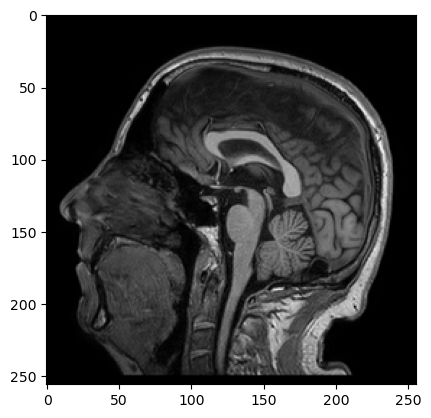

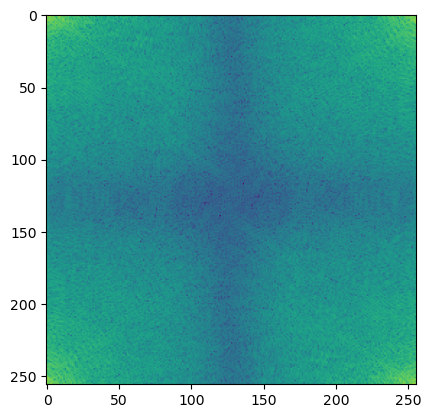

In [2]:
plt.figure()
plt.imshow(t1_slice, cmap='gray')
plt.show()

fft_t1_slice = sp.fft(t1_slice, center=False)
plt.figure()
plt.imshow(np.log10(abs(fft_t1_slice)))
plt.show()

# 1. Simulation of radial sampling: (15%)

(96, 256, 2)


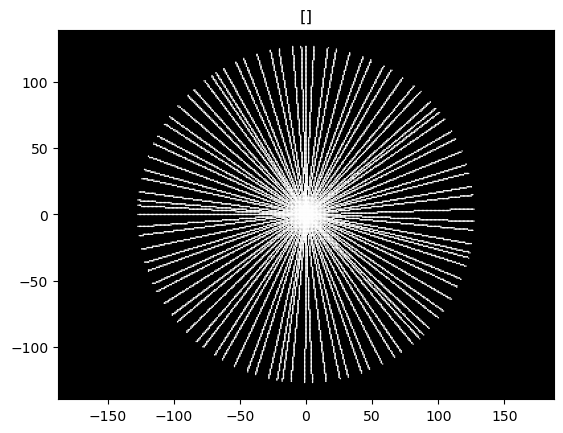

In [3]:
spikes = 96
coord = sp.mri.radial([spikes,256,2],[256,256], dtype=int)
print(coord.shape)

sp.plot.ScatterPlot(coord)

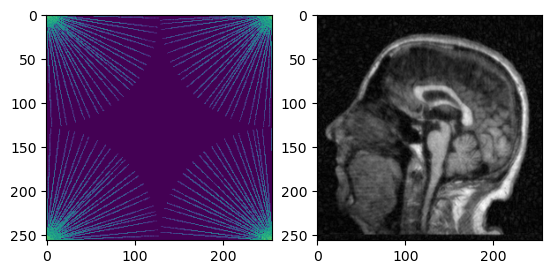

In [4]:
new_fft = np.zeros_like(fft_t1_slice)
new_fft[coord[:,:,1],coord[:,:,0]] = fft_t1_slice[coord[:,:,1],coord[:,:,0]]

new_ifft = sp.ifft(new_fft, center=False)

plt.figure()
plt.subplot(121)
plt.imshow(np.log10(abs(new_fft)+1))

plt.subplot(122)
plt.imshow(abs(new_ifft), cmap='gray')
plt.show()

Acceleration factor:  1.0


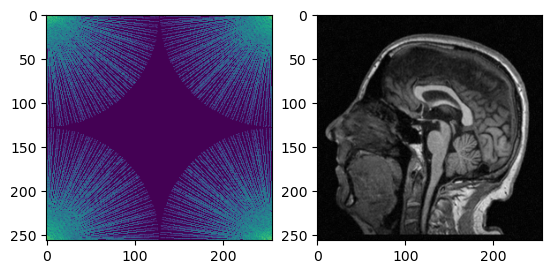

Acceleration factor:  2.0


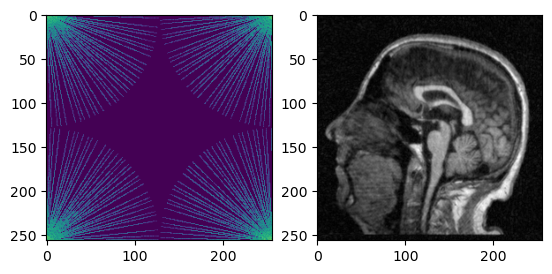

Acceleration factor:  4.0


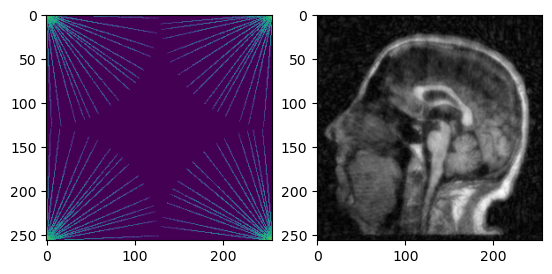

Acceleration factor:  9.846153846153847


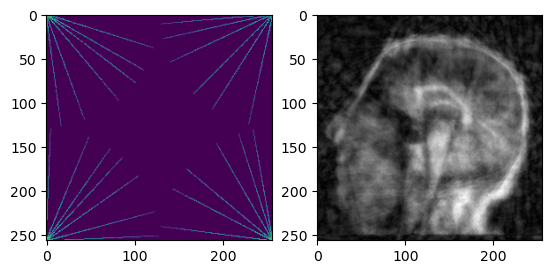

In [15]:
# compute acceleration factor:
# acceleration factor is number of sample points with cartesion sampling divided by number of sampling points with radial points:
# acc = (256*256)/(n_spikes*samples_per_spikes) -> with samples_per_spikes=256:  n_spikes = 256/acc
# acc in [1, 10]: upper boundary: n_spikes >= 256/10 = 25.6; lower boundary: n_spikes <= 256/1 = 256
# --> Values for spikes between 26 and 156 spikes are permissable

n_spikes = [256, 128, 64, 26] # list of number of spikes

ffts = [] # list to store ffts
iffts = [] # list to store subsampled images

for n in n_spikes:
    coord = sp.mri.radial([n,256,2],[256,256], dtype=int)
    tmp_fft = np.zeros_like(fft_t1_slice)
    tmp_fft[coord[:,:,1],coord[:,:,0]] = fft_t1_slice[coord[:,:,1],coord[:,:,0]]
    ffts.append(tmp_fft)
    iffts.append(sp.ifft(tmp_fft, center=False))

# plot all ffts and respective iffts
for n, fft, ifft in zip(n_spikes, ffts, iffts):
    print("Acceleration factor: ", 256/n)
    plt.figure()
    plt.subplot(121)
    plt.imshow(np.log10(abs(fft)+1))
    plt.subplot(122)
    plt.imshow(abs(ifft), cmap='gray')
    plt.show()


## Task 2: Quality assessment (10%)